
Training Data Scatter Plot
Scatter Plot


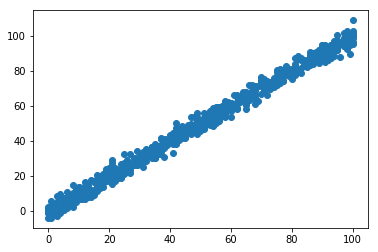


Starting Linear Regression with m = 0 b = 0 error = 1668.3262288672474
Starting...



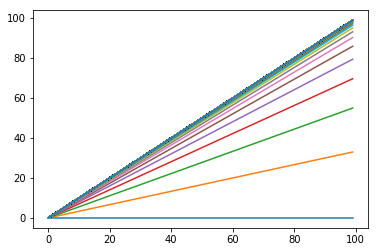


Ending Linear Regression with m = 0.99912461444440404 b = 0.0098090852924719186 error = 3.9466617544296434

Plotting Best Fit Line
Printing Best fit Line


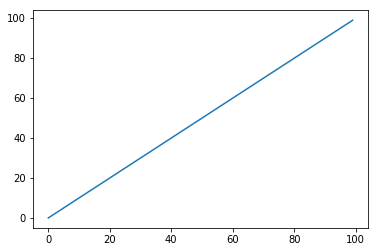

Ploting actual Data from test file
Scatter Plot


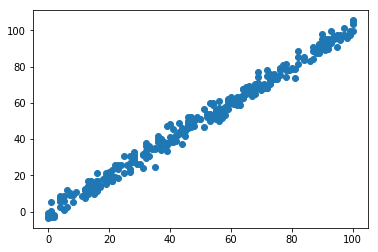




Ploting Predicted data of Y 
Scatter Plot


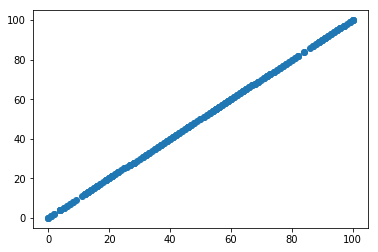


Y actual = 79.775152009999999 | Y Predicted = 76.942404397511581
Y actual = 23.177278869999999 | Y Predicted = 20.991425988624954
Y actual = 25.60926156 | Y Predicted = 21.990550603069359
Y actual = 17.85738813 | Y Predicted = 19.992301374180553
Y actual = 41.84986439 | Y Predicted = 35.978295205291019
Y actual = 9.8052348760000001 | Y Predicted = 14.996678301958532
Y actual = 58.87465933 | Y Predicted = 61.955535180845523
Y actual = 97.617937010000006 | Y Predicted = 94.926647457510853
Y actual = 18.395127469999998 | Y Predicted = 19.992301374180553
Y actual = 8.746747654 | Y Predicted = 5.005432157514492
Y actual = 2.8114158260000002 | Y Predicted = 4.0063075430700881
Y actual = 17.09537241 | Y Predicted = 18.993176759736148
Y actual = 95.149071759999998 | Y Predicted = 95.925772071955265
Y actual = 61.38800663 | Y Predicted = 61.955535180845523
Y actual = 40.247017159999999 | Y Predicted = 35.978295205291019
Y actual = 14.822485889999999 | Y Predicted = 14.996678301958532
Y actual 

In [13]:
from numpy import * 
from matplotlib import pyplot as plt
%matplotlib inline

#Getting data from file and spliting it into x axis and y axis
def getdata(datafile,delimiter_in_file,header_skiping):
    training_data = genfromtxt(datafile,delimiter=delimiter_in_file,skip_header = header_skiping,dtype=str)
    x = [] # x-axis data
    y = [] # y-axis data
    for i in range(0,len(training_data)):
        x.append(float(training_data[i][0]))
        y.append(float(training_data[i][1]))
    return x,y


#Error Finder
#formula : 1/2n{summition from i=1 to n (y[i] - (m * x[i] + b))}
def error(m,b,x,y):
    total_error = 0.0
    for i in range(0,len(x)):
        total_error+= ((m * x[i] + b) - y[i]) ** 2
    return total_error/(2 * float(len(x)))

#Function by which we can get new values of m and b
#Using gradient descent ( Partial Derivative )
#Having Formula : 
# curl/curl{m} = {summition from i = 1 to n of -x[i] * (y[i] - (m * x[i] + b))}
# curl/curl{b} = {summition from i = 1 to n of -(y[i] - (m * x[i] + b))}
def step_gradient(m,b,x,y,learning_rate):
    m_gradient = 0.0 #initial gradient
    b_gradient = 0.0 #initial intercept
    for i in range(0,len(x)):
        m_gradient+=(-x[i] * (y[i]- (m * x[i]) + b))
        b_gradient+=(-(y[i] - ((m * x[i]) + b)))
    #new m using formula of gradient descent
    #new path point = old path point - (alpha) * gradient
    #alpha = learning rate , as what the speed at which we go downward in graph
    #to find minima
    new_m = m - (learning_rate * (m_gradient)/float(len(x)))
    new_b = b - (learning_rate * (b_gradient)/float(len(x)))
    return new_m,new_b

#running gradient descent upto num of iteration say 10,000 time we get 
#different m and b and after last we found m and b 
def gradient_descent_run(old_m,old_b,num_iterations,x,y,learning_rate):
    m = old_m # getting old b
    b = old_b # getting old m
    mb = []
    for i in range(num_iterations):
        #calling step gradient upto num iterations time
        #in this m and b get change again and again upto num iterations
        mb.append([m,b])
        m,b = step_gradient(m,b,x,y,learning_rate)
    return m,b,mb

#Test file data to run Test on calculated final m and b
#and predict the y
def test(m,b,x):
    y_new = [] #creating empty list of y_new
    print()
    for i in range(0,len(x)):
        #appending y_new list with y_new = mx+b have x input and y output
        y_new.append(m * x[i] + b)
    return y_new 

    
def train(datafile,delimiter_in_file,skiping_header,num,alpha):
    
    #Getting X and Y values from File of training data
    x,y = getdata(datafile,delimiter_in_file,skiping_header)
    m_initial = 0 #initial slope
    b_initial = 0 #initial intercept
    num_iterations = num #num of iterations
    learning_rate = alpha #learning rate
    print()
    print('Training Data Scatter Plot')
    plot_graph(x,y) #plotting Training Data
    print()
    print('Starting Linear Regression with m = '+str(m_initial)+' b = '+str(b_initial)+' error = ' + str(error(m_initial,b_initial,x,y)))
    print('Starting...')
    print()
    m,b,mb = gradient_descent_run(m_initial,b_initial,num_iterations,x,y,learning_rate)
    plot_lines(mb)
    print()
    print('Ending Linear Regression with m = '+str(m)+' b = '+str(b)+' error = ' + str(error(m,b,x,y)))
    print()
    print('Plotting Best Fit Line')
    plot_final_line(m,b) #Plotting Best Fit Line
    return m,b,error(m,b,x,y)

def plot_lines(mb):
    xyi=[]
    for i in range(0,len(mb)):
        m = mb[i][0]
        b = mb[i][1]
        xyi.append(xy(m,b))
    pl(xyi)
    
def pl(xyi):
    for i in range(0,len(xyi)):
        plt.plot(xyi[i][0],xyi[i][1])
    plt.show()

def xy(m,b):
    x = []
    y = []
    for i in range(0,100):
        x.append(i)
    for i in range(0,len(x)):
        y.append(m * x[i] + b)
    return x,y
#plotting Scatter Graph Function
def plot_graph(x,y):
    print('Scatter Plot')
    plt.scatter(x,y)
    plt.show()

#plotting Best Fit Line Function
def plot_final_line(m,b):
    print('Printing Best fit Line')
    x = []
    y = []
    for i in range(0,100):
        x.append(float(i))
    for i in range(0,len(x)):
        y.append(m * x[i] + b)
    plt.plot(x,y)
    plt.show()

def run(trainfile,testfile,delimiter,skip_header,num,alpha):
    #getting m , b ,error from training data main function
    m,b,e = train(trainfile,delimiter,skip_header,num,alpha)
    #getting x and y from test data file
    x,y = getdata(testfile,delimiter,skip_header)
    #plotting graph of actual dataset in test
    print('Ploting actual Data from test file')
    plot_graph(x,y)
    print()
    #Calculating Prediction of y
    y_new = test(m,b,x)
    print()
    #plotting graph of Predicted y with actual x 
    print('Ploting Predicted data of Y ')
    plot_graph(x,y_new)
    print()
    #printing y actual and corresponding to its y_new
    for i in range(0,len(y)):
        print('Y actual = ' + str(y[i]),end = ' | ')
        print('Y Predicted = ' + str(y_new[i]))
    print()
    print('Ending Linear Regression with m = '+str(m)+' b = '+str(b)+' error = ' + str(e))
    print()

# --------------Main---------------- #

#run('data/train.csv','data/test.csv',',',1,30000,0.0001)
run('data/train.csv','data/test.csv',',',1,1001,0.0001)
print()
print('Sanheen Sethi')